# Importing the dataset


In [36]:
from __future__ import unicode_literals
from hazm import *
import numpy as np
# import tensorflow as tf
import pandas as pd
from collections import Counter
import csv, re, pickle

# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Flatten
# import numpy as np
# from keras.utils import to_categorical
# import re
# from utils import words_list, stopwords_list
# from stopping_utility import *
# import nltk
# import wapiti

from colorama import Back, Fore, Style
import time
from sklearn import metrics
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import manifold
import pyclustering as pyclus
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [37]:
# load the dataset
dataset = pd.read_excel('QuestionForTextMining_No_NewLine.xlsx')

dataset.head()


id  user_id                                               text  \
0  757699     4965  üí•üí•üí•üí•ÿ®⁄ÜŸá Ÿáÿß üí•üí•üí•üí•  ÿ®€åÿß€å€åŸÜÿåÿ≥ŸàÿßŸÑ ŸÖÿ´ÿ®ÿ™ €±€∏ üî•üî• ÿØÿßÿ±ŸÖ üôä...   
1  757688    43258  ŸàÿßŸÇÿπÿß ⁄© ÿ®ÿπÿ∂€åÿß ⁄ÜŸÇÿØ ÿ®€å ÿØÿ±⁄©ŸÜ Ÿà ÿßÿØÿπÿß ÿØÿßÿ±ŸÜ ŸÅŸÇÿ∑.ÿ®ŸÜÿØŸá...   
2  757646    68217  ŸàÿßŸÇÿπÿß ⁄©Ÿá ⁄Üÿ±ÿß ÿß€åŸÜ⁄©ÿßÿ±ÿß ÿ±Ÿà ŸÖ€å⁄©ŸÜ€åŸÜ €å⁄©€åÿ™ŸàŸÜ ÿ®⁄ÜŸá ÿ≥ŸÇÿ∑ ...   
3  756589    68139  ÿÆÿßŸÜŸÖÿß ⁄ÜÿßŸÑÿ¥ ŸÜÿ≤ÿßÿ¥ÿ™€åŸÜ ÿßŸÖÿ±Ÿàÿ≤üòÄ⁄ÜŸá ÿπÿ¨ÿ®  €åŸá ⁄ÜÿßŸÑÿ¥ ÿ®⁄Ø€åŸÜ ...   
4  756586     2724  ÿ≥ŸÑÿßŸÖ ⁄Üÿ∑Ÿàÿ±€åÿØ ÿÆŸàÿ®€åÿØÿüüòÅüòÑüòòüòòüòòüòòÿ±ŸÜ⁄Ø ŸÖŸàÿ±Ÿàÿ¥ŸÜ ÿÆŸàÿ¥⁄ØŸÑ ŸÖ€åÿÆŸàÿß...   

   ÿßÿ¥ÿ™ÿ±ÿß⁄© ŸÖÿ≠ÿ™Ÿàÿß€å ÿ¥ÿÆÿµ€å  ÿßÿ¥ÿ™ÿ±ÿß⁄© ŸÖÿ≠ÿ™Ÿàÿß€å ÿ∫€åÿ±ÿ¥ÿÆÿµ€å  ÿ™ÿ®ŸÑ€åÿ∫  ÿØÿ±ÿÆŸàÿßÿ≥ÿ™ ÿ±ÿßŸáŸÜŸÖÿß€å€å  \
0                   0                      0      0                 1   
1                   1                      0      0                 0   
2                   1                      0      0                 0   
3                   1                      0      0                 0   
4                   0                      0      0                 1   

   ÿØÿπŸàÿ™ ÿ®Ÿá ÿµÿ≠ÿ®ÿ™ ⁄©ÿ±ÿØŸÜ  ŸÖÿ®ŸáŸÖ  ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ŸÑ⁄© ŸÑ⁄©  ...  ÿ¥ÿßÿØ€å  ÿ∫ŸÖ Ÿà ŸÜÿßÿ±ÿßÿ≠ÿ™€å  ŸÖÿ™ÿπÿßÿØŸÑ  \
0                  0     0               0  ...     0             0       1   
1                  0     0               0  ...     0             0       0   
2                  0     0               0  ...     0             0       0   
3                  0     0               0  ...     1             0       0   
4                  0     0               0  ...     0             0       0   

   ŸÜŸÅÿ±ÿ™  ŸÜ⁄Øÿ±ÿßŸÜ€å  ÿ™€åŸÖ ŸÑ⁄©‚ÄåŸÑ⁄©  ÿØŸàÿ≥ÿ™ÿßŸÜÿ¥ ÿØÿ± ŸÑ⁄©‚ÄåŸÑ⁄©  ŸÅÿ±ÿØ(ÿßŸÅÿ±ÿßÿØ) ÿÆÿßÿµ€å ÿØÿ± ŸÑ⁄©‚ÄåŸÑ⁄©  ŸáŸÖŸá  \
0     0       0          0                 0                         0    1   
1     0       0          0                 0                         0    0   
2     0       0          0                 0                         0    0   
3     0       0          0                 0                         0    0   
4     0       0          0                 0                         0    0   

   ⁄Øÿ±ŸàŸá€å ÿßÿ≤ ÿ®ÿßŸÜŸàÿßŸÜ ŸÑ⁄©‚ÄåŸÑ⁄©  
0                      0  
1                      1  
2                      1  
3                      0  
4                      0  

[5 rows x 43 columns]

In [38]:
normalizer = Normalizer()
# print(dataset['text'][1])
normalizList = []
normalizList = [normalizer.normalize(dataset['text'][i]) for i in  range(len(dataset['text']))]
dataset['text'] = normalizList

# Preliminary text exploration


## Fetch word count for each abstract


In [39]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset[['text','word_count']].head()


text  word_count
0  üí•üí•üí•üí•ÿ®⁄ÜŸá‚ÄåŸáÿß üí•üí•üí•üí• ÿ®€åÿß€å€åŸÜÿå ÿ≥ŸàÿßŸÑ ŸÖÿ´ÿ®ÿ™ €±€∏ üî•üî• ÿØÿßÿ±ŸÖ üôä...           9
1  ŸàÿßŸÇÿπÿß ⁄© ÿ®ÿπÿ∂€åÿß ⁄ÜŸÇÿØ ÿ®€å ÿØÿ±⁄©ŸÜ Ÿà ÿßÿØÿπÿß ÿØÿßÿ±ŸÜ ŸÅŸÇÿ∑. ÿ®ŸÜÿØ...          63
2  ŸàÿßŸÇÿπÿß ⁄©Ÿá ⁄Üÿ±ÿß ÿß€åŸÜ⁄©ÿßÿ±ÿß ÿ±Ÿà ŸÖ€å⁄©ŸÜ€åŸÜ €å⁄©€åÿ™ŸàŸÜ ÿ®⁄ÜŸá ÿ≥ŸÇÿ∑ ...          52
3  ÿÆÿßŸÜŸÖÿß ⁄ÜÿßŸÑÿ¥ ŸÜÿ≤ÿßÿ¥ÿ™€åŸÜ ÿßŸÖÿ±Ÿàÿ≤üòÄ⁄ÜŸá ÿπÿ¨ÿ® €åŸá ⁄ÜÿßŸÑÿ¥ ÿ®⁄Ø€åŸÜ ÿ≠...          18
4  ÿ≥ŸÑÿßŸÖ ⁄Üÿ∑Ÿàÿ±€åÿØ ÿÆŸàÿ®€åÿØÿü üòÅüòÑüòòüòòüòòüòòÿ±ŸÜ⁄Ø ŸÖŸàÿ±Ÿàÿ¥ŸÜ ÿÆŸàÿ¥⁄ØŸÑ ŸÖ€åÿÆŸà...          13

In [40]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count    8063.000000
mean       22.486667
std        20.469866
min         1.000000
25%        11.000000
50%        17.000000
75%        26.000000
max       171.000000
Name: word_count, dtype: float64

## Most common and uncommon words


In [41]:
#Identify common words
freq = pd.Series(' '.join(dataset['text']).split()).value_counts()
f = list(pd.DataFrame(freq).index)


In [42]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset 
         ['text']).split()).value_counts()[-20:]
freq1

ÿ™ÿÆŸÖÿØÿßŸÜÿßŸÖ        1
Ÿæÿ±€åŸàÿØÿØÿßÿ±ŸÖ       1
ÿ®ÿ≥ÿ™ŸÖ            1
ÿßÿµŸÑÿßŸÖŸÜ          1
ÿ™⁄©ŸÖ€åŸÑÿü!!!       1
‚Ä¶ÿßŸÖÿ±Ÿàÿ≤⁄ÜŸÜÿØÿ±Ÿàÿ≤    1
ŸÑÿß€å             1
ŸÖ€åÿØÿßÿØüò≥üò≥         1
ÿ±Ÿàÿ≠ÿ∞ŸÅ           1
ÿ®ÿØÿ®ÿßÿ¥Ÿá          1
⁄Ø€åÿ±ŸÖ‚ÄåÿßŸàŸÖÿØŸá      1
üòêüòêüòêüòêüòêüòêüò¨üò¨üò¨       1
⁄ÜŸÇÿØÿ±ÿ®Ÿáÿ¥         1
ŸÖÿπÿØŸÖŸà           1
ÿπŸÇ€åÿØŸá           1
ŸÖÿØÿ±ÿ≥Ÿá.          1
ÿ≤ÿß€åŸÖÿßŸÜÿ¥ŸàŸÜÿü      1
ÿ®ÿ±⁄Øÿ±ÿØŸàŸÜŸá..      1
ÿØŸÑ€åÿ±            1
ÿ≤Ÿáÿ±             1
dtype: int64

## Text Pre-processing

In [43]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [44]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [45]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("persian"))
# ##Creating a list of custom stopwords
# new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
# stop_words = stop_words.union(new_words)

In [46]:
corpus = []
for i in range(len(dataset['text'])):
    #Remove punctuations
    each = dataset['text'][i].replace('\u200f',' ')
    text = re.sub(r'[^a-zA-Z0-9ÿ¢-€å€∞-€π ]', '', each)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [47]:
# # #View corpus item
# # corpus[38]
# i=10
# j=50
# each = dataset['text'][1353]
# print(each.split())
# each = dataset['text'][1353].replace('\u200f',' ')

# text = re.sub(r'[^a-zA-Z0-9ÿ¢-€å€∞-€π ]', ' ', each)

# #Convert to lowercase
# text = text.lower()

# #remove tags
# text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

# # remove special characters and digits
# text=re.sub("(\\d|\\W)+"," ",text)

# ##Convert to list from string
# text = text.split()

# ##Stemming
# ps=PorterStemmer()
# #Lemmatisation
# lem = WordNetLemmatizer()
# text = [lem.lemmatize(word) for word in text if not word in stop_words] 
# text = " ".join(text)
# text

In [48]:
#Fetch wordcount for each abstract
corpusData = []
corpusData = pd.DataFrame(corpusData)
corpusData['text'] = corpus
corpusData['word_count'] = corpusData['text'].apply(lambda x: len(str(x).split(' ')))
corpusData[['text','word_count']].head()


text  word_count
0                             ÿ®⁄ÜŸáŸáÿß ÿ®€åÿß€å€åŸÜ ÿ≥ŸàÿßŸÑ ŸÖÿ´ÿ®ÿ™           4
1  ⁄© ÿ®ÿπÿ∂€åÿß ⁄ÜŸÇÿØ ÿØÿ±⁄©ŸÜ ÿßÿØÿπÿß ÿØÿßÿ±ŸÜ ÿ®ŸÜÿØŸá ÿÆÿØÿß ŸÑÿßÿ®ÿØ ÿØÿ≥ÿ™ÿ±ÿ≥...          45
2  ÿß€åŸÜ⁄©ÿßÿ±ÿß ŸÖ€å⁄©ŸÜ€åŸÜ €å⁄©€åÿ™ŸàŸÜ ÿ®⁄ÜŸá ÿ≥ŸÇÿ∑ ÿπ⁄©ÿ≥ ÿ¨ŸÜ€åŸÜ ÿ≥ŸÇÿ∑ ÿØÿ≥ÿ™...          30
3  ÿÆÿßŸÜŸÖÿß ⁄ÜÿßŸÑÿ¥ ŸÜÿ≤ÿßÿ¥ÿ™€åŸÜ ÿßŸÖÿ±Ÿàÿ≤⁄ÜŸá ÿπÿ¨ÿ® ⁄ÜÿßŸÑÿ¥ ÿ®⁄Ø€åŸÜ ÿ≠ŸàÿµŸÑŸÖ...          15
4  ÿ≥ŸÑÿßŸÖ ⁄Üÿ∑Ÿàÿ±€åÿØ ÿÆŸàÿ®€åÿØ ÿ±ŸÜ⁄Ø ŸÖŸàÿ±Ÿàÿ¥ŸÜ ÿÆŸàÿ¥⁄ØŸÑ ŸÖ€åÿÆŸàÿßŸÖ ÿØ⁄©ŸÑÿ±...          12

## Data Exploration

In [49]:
#Word cloud for English and Persian

#!/usr/bin/env python
"""
Minimal Example
===============
Generating a square wordcloud from the US constitution using default arguments.
"""
from os import path
from persian_wordcloud.wordcloud import PersianWordCloud, add_stop_words
from wordcloud import STOPWORDS as EN_STOPWORDS


# Add another stopword

# stopwords = add_stop_words(f[0:250])
stopwords = add_stop_words(list(EN_STOPWORDS))
stopwords |= stop_words
stopwords |= set(['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're',
                  'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn',
                  'ÿßÿ´ÿ±', 'ÿßŸÑÿ®ÿ™', 'ÿ®ÿßŸÑÿß€å', 'ÿ™ŸàŸÑ', 'ÿ™Ÿà€å', 'ÿ™€å', 'ÿ¨ŸÑŸà€å', 'ÿ≠ÿØŸàÿØ', 'ÿÆÿßÿ±ÿ¨', 'ÿØŸÜÿ®ÿßŸÑ', 'ÿ±ÿ≥ÿØ', 'ÿ±ŸàÿØ', 'ÿ≥ÿ±€å','ŸÖ€åÿ¥Ÿá', 'ÿ¨Ÿàÿßÿ® ÿ®ÿØ€åŸÜ',
                  'ÿ¨Ÿàÿßÿ® ÿ®ÿØ€åÿØ', 'ŸÖ€å⁄ØŸá', 'ÿßŸàŸÜ','ÿ®ÿØ€åÿØ', 'ÿ®ÿØ€åŸÜ', 'ÿ¨Ÿàÿßÿ®','ÿ≥ŸÑÿßŸÖ',
                  'ÿ≥ŸÖÿ™', 'ÿ∂ÿØ', 'ÿ∑ÿ®ŸÇ', 'ÿπŸÇÿ®', 'ÿπŸÑ', 'ŸÇÿµÿØ', 'ŸÖÿØ', 'ŸÜÿ≤ÿØ', 'ŸÜÿ≤ÿØ€å⁄©', 'Ÿàÿ≥ÿ∑', 'Ÿæÿßÿπ€åŸÜ', 'Ô∫ÆÔ∫ó', 'Ô∫±Ô∫éÔ∫≥Ô∫çÔ∫ÆÔ∫ë', 'Ô∫∂Ô∫∑', 'Ôª™Ô∫òÔ∫∑Ô∫çÔ∫™Ôªß'])
stopwords - set('ÿ®⁄ÜŸá')



{'ŸÜÿßÿ¥Ÿä',
 'ÿ¥ŸàŸÖ',
 'Ÿáÿ≥ÿ™ŸÖ',
 'ÿ®€åÿßÿ®ÿØ',
 'ŸÜÿ≤ÿØ€å⁄©Ÿê',
 'ÿ®Ÿà€å⁄òŸá',
 'ÿß€åŸÜ',
 'ÿ∏ÿßŸáÿ±ÿß',
 'ŸÖÿ¨ÿØÿØÿß',
 '⁄ØŸá⁄ØÿßŸá',
 'Ÿà€å⁄òŸá',
 'Ô∫≠ÔªÆÔªÉ',
 'Ôª¶Ôª≥Ô∫ÆÔ∫ó',
 'ÿ®ÿ±ÿßŸä',
 'ÿÆŸàÿØŸÖ',
 'ÔªûÔ∫úÔª£',
 '⁄Øÿ∞ÿßÿ±Ÿä',
 'ÿ¨ÿßŸäŸä',
 'Ô∫™ÔªßÔ∫≠Ô∫çÔ∫™Ôªß',
 'Ô∫™Ôª®Ôªõ',
 '⁄©ŸÜÿßÿ±Ÿê',
 'Ÿà€å',
 '€åÿßÿ®€åŸÖ',
 'ÿ±ÿßÿ≠ÿ™',
 'ÿ¨ÿØ€åÿØ',
 'Ÿ™',
 'Ôª±Ô∫≠Ô∫çÔ∫©Ô∫ÆÔ∫ë',
 'ÿ±Ÿäÿ≤Ÿä',
 '⁄ÜŸÜÿßŸÜ',
 'ÿÆŸàÿßÿ≥ÿ™€åŸÖ',
 'Ôª°Ôª≠Ô∫©',
 'Ô∫ûÔª®Ô≠ò',
 'ÔªûÔ∫ëÔ∫éÔªòÔª£',
 '⁄ØŸà€åÿß',
 'ÿÆŸàÿßÿ≥ÿ™',
 'ÿ®⁄Ø€åÿ±ŸÖ',
 'ŸÉŸÑ',
 '⁄ÜŸàŸÜ',
 'ŸáŸÖ€åŸÜ',
 'ÿØŸáŸÖ',
 'ŸÉŸÜŸÜÿØ',
 'ÿÆŸàÿßÿ≥ÿ™ŸÖ',
 'Ô∫éÔª¨Ôª®Ô∫ó',
 'ŸÜŸÖ€å',
 'ÿ®ÿÆÿ¥€å',
 'ÿ®⁄©ŸÜÿØ',
 'ÿ®ÿßŸäÿØ',
 'Ô∫™Ôª®Ô∫òÔ∫∑Ô∫çÔ∫©',
 'ÿ±ÿ≥ÿØ',
 'ÿ®⁄Ø€åÿ±ÿØ',
 'ŸáÿßŸäŸä',
 'Ôª©Ô∫çÔ∫≠',
 '⁄©ÿØÿßŸÖ',
 'Ôª™Ôªõ',
 'Ô∫™Ô∫ºÔªó',
 '⁄©ŸÜ€åŸÖ',
 'Ôª°Ô∫éÔª§Ô∫ó',
 'ÿ®ÿ±ÿßÿ≥ÿ™€å',
 'Ôª¶Ôª¥Ôª®Ô≠ΩÔª§Ôª´',
 'ŸÜŸäÿ≥ÿ™',
 'ÔØΩÔ∫≥Ô∫ÆÔª£',
 'ÿßÿ≤',
 'Ô∫™Ôª®Ôª´Ô∫©',
 'Ô∫éÔªîÔªÑÔªü',
 'ÿ™ÿ±',
 'ÿ®ŸàÿØ',
 '⁄©ŸÜÿßÿ±',
 'Ôª±Ô∫çÔ∫ÆÔ∫ë',
 'ÿØŸäÿ±Ÿàÿ≤',
 'ŸÉÿ±ÿØŸá',
 '⁄©

In [50]:
# Python program for insert and search 
# operation in a Trie 

class TrieNode: 

    # Trie node class 
    def __init__(self): 
        self.children = [None]*90000

        # isEndOfWord is True if node represent the end of the word 
        self.isEndOfWord = False

class Trie: 

    # Trie data structure class 
    def __init__(self): 
        self.root = self.getNode() 

    def getNode(self): 

        # Returns new trie node (initialized to NULLs) 
        return TrieNode() 

    def _charToIndex(self,ch): 

        # private helper function 
        # Converts key current character into index 
        # use only 'a' through 'z' and lower case 

        return ord(ch)-ord('!') 


    def insert(self,key): 

        # If not present, inserts key into trie 
        # If the key is prefix of trie node, 
        # just marks leaf node 
        pCrawl = self.root 
        length = len(key) 
        for level in range(length): 
            index = self._charToIndex(key[level]) 

            # if current character is not present 
            if not pCrawl.children[index]: 
                pCrawl.children[index] = self.getNode() 
            pCrawl = pCrawl.children[index] 

        # mark last node as leaf 
        pCrawl.isEndOfWord = True

    def search(self, key): 

        # Search key in the trie 
        # Returns true if key presents 
        # in trie, else false 
        pCrawl = self.root 
        length = len(key) 
        for level in range(length): 
            index = self._charToIndex(key[level]) 
            if not pCrawl.children[index]: 
                return False
            pCrawl = pCrawl.children[index] 

        return pCrawl != None and pCrawl.isEndOfWord 

# # driver function 
# def main(): 

#     # Input keys (use only 'a' through 'z' and lower case) 
#     keys = list(stopwords.loc[:,0])

#     output = ["Not present in trie", 
#             "Present in trie"] 

#     # Trie object 
#     t = Trie() 

#     # Construct trie 
#     for key in keys: 
#         t.insert(key) 

#     # Search for different keys 
# #     print("{} ---- {}".format("the",output[t.search("the")])) 
# #     print("{} ---- {}".format("these",output[t.search("these")])) 
# #     print("{} ---- {}".format("their",output[t.search("their")])) 
#     print("{} ---- {}".format("ÿßÿ≤ŸÜÿ∞",output[t.search("ÿßÿ≤ŸÜÿ∞")])) 

# if __name__ == '__main__': 
#     main() 

# This code is contributed by Atul Kumar (www.facebook.com/atul.kr.007) 


In [51]:
# Input keys (use only 'a' through 'z' and lower case) 
keys = list(stopwords)

output = ["Not present in trie", 
        "Present in trie"] 

# Trie object 
t = Trie() 

# Construct trie 
for key in keys: 
    t.insert(key) 


print("{} ---- {}".format("ÿßÿ≤",output[t.search("ÿßÿ≤")])) 


ÿßÿ≤ ---- Present in trie


In [52]:
'ÿ≥ŸÑÿßŸÖ' in keys

True

In [53]:
i = 0
holdingCorpus = corpus.copy()
corpus1 = corpus.copy()
for rev in corpus1:
#     rev = rev.replace('\u200c',' ')
    rev = rev.replace('\u200f',' ')
    rev = re.sub(r'[^a-zA-Z0-9ÿ¢-€å€∞-€π ]', ' ', rev)
    rev.split(' ')
    words = rev.split(' ')

    words1 = words.copy()
    for w in words:
        if w == '':
            words1.remove(w)
            continue
        if t.search(w):
            words1.remove(w)

    words = words1
    text = ''
    for w in words:
        text += w + ' '
    corpus1[i] = text
    i += 1
corpus = corpus1.copy()
del corpus1

In [54]:
# corpus

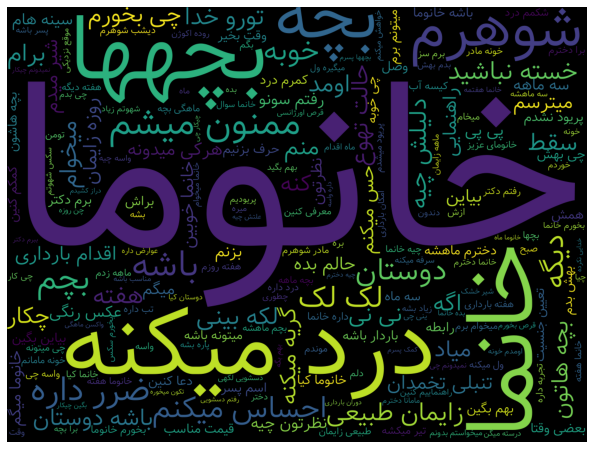

In [55]:

# Generate a word cloud image
text = ''
for t in corpus:
    text = text+' \n'+t

wordcloud = PersianWordCloud(
    only_persian=True,
    max_words=200,
    stopwords=stopwords,
    margin=0,
    width=1200,
    height=900,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()
image.save('en-fa-result.png')

print(wordcloud)
fig = plt.figure(1)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()



## Text preparation

### Creating a vector of word counts

In [56]:
# cv

In [57]:

from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stopwords, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [58]:
list(cv.vocabulary_.keys())[:10]

['ÿ®⁄ÜŸáŸáÿß',
 'ÿ®€åÿß€å€åŸÜ',
 'ÿ≥ŸàÿßŸÑ',
 'ŸÖÿ´ÿ®ÿ™',
 'ÿ®ÿπÿ∂€åÿß',
 '⁄ÜŸÇÿØ',
 'ÿØÿßÿ±ŸÜ',
 'ÿ®ŸÜÿØŸá',
 'ÿÆÿØÿß',
 'ŸÜÿØÿßÿ±Ÿá']

In [59]:
# stopwords

Visualize top N uni-grams, bi-grams & tri-grams

       Word  Freq
0     ÿÆÿßŸÜŸÖÿß  1077
1    ÿÆÿßŸÜŸàŸÖÿß  1005
2       ÿ®⁄ÜŸá   869
3      ÿØÿßÿ±Ÿá   839
4      ÿ®ÿßÿ¥Ÿá   810
5        ⁄Ü€å   783
6      ŸáŸÅÿ™Ÿá   690
7     ÿ¥ŸàŸáÿ±ŸÖ   638
8     ŸÖ€å⁄©ŸÜŸá   635
9     ÿ®⁄ÜŸáŸáÿß   577
10   ÿØŸàÿ≥ÿ™ÿßŸÜ   565
11      ÿØÿ±ÿØ   539
12      ŸÖÿßŸá   511
13     ÿØ⁄©ÿ™ÿ±   476
14      ⁄Ü€åŸá   457
15    ⁄Ü€å⁄©ÿßÿ±   452
16     ÿØ€å⁄ØŸá   449
17  ÿ®ÿßÿ±ÿØÿßÿ±€å   448
18    ŸÖ€å⁄©ŸÜŸÖ   417
19   ŸÖ€åÿÆŸàÿßŸÖ   408


[Text(0, 0, 'ÿÆÿßŸÜŸÖÿß'),
 Text(0, 0, 'ÿÆÿßŸÜŸàŸÖÿß'),
 Text(0, 0, 'ÿ®⁄ÜŸá'),
 Text(0, 0, 'ÿØÿßÿ±Ÿá'),
 Text(0, 0, 'ÿ®ÿßÿ¥Ÿá'),
 Text(0, 0, '⁄Ü€å'),
 Text(0, 0, 'ŸáŸÅÿ™Ÿá'),
 Text(0, 0, 'ÿ¥ŸàŸáÿ±ŸÖ'),
 Text(0, 0, 'ŸÖ€å⁄©ŸÜŸá'),
 Text(0, 0, 'ÿ®⁄ÜŸáŸáÿß'),
 Text(0, 0, 'ÿØŸàÿ≥ÿ™ÿßŸÜ'),
 Text(0, 0, 'ÿØÿ±ÿØ'),
 Text(0, 0, 'ŸÖÿßŸá'),
 Text(0, 0, 'ÿØ⁄©ÿ™ÿ±'),
 Text(0, 0, '⁄Ü€åŸá'),
 Text(0, 0, '⁄Ü€å⁄©ÿßÿ±'),
 Text(0, 0, 'ÿØ€å⁄ØŸá'),
 Text(0, 0, 'ÿ®ÿßÿ±ÿØÿßÿ±€å'),
 Text(0, 0, 'ŸÖ€å⁄©ŸÜŸÖ'),
 Text(0, 0, 'ŸÖ€åÿÆŸàÿßŸÖ')]

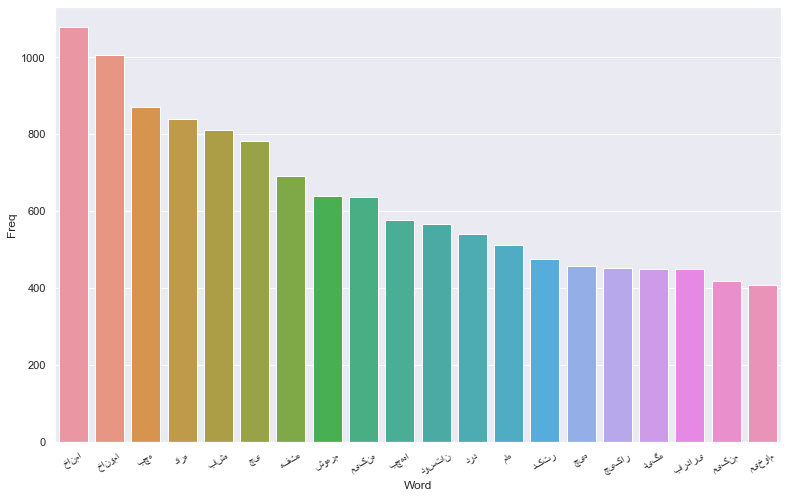

In [60]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
print(top_df)
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

          Bi-gram  Freq
0       ÿØÿ±ÿØ ŸÖ€å⁄©ŸÜŸá   168
1      ŸÖŸÖŸÜŸàŸÜ ŸÖ€åÿ¥ŸÖ   108
2        ÿ∂ÿ±ÿ± ÿØÿßÿ±Ÿá    90
3           ŸÑ⁄© ŸÑ⁄©    69
4     ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖ€å⁄©ŸÜŸÖ    69
5    ÿ≤ÿß€åŸÖÿßŸÜ ÿ∑ÿ®€åÿπ€å    65
6     ÿÆÿ≥ÿ™Ÿá ŸÜÿ®ÿßÿ¥€åÿØ    65
7       ÿØŸÑ€åŸÑÿ¥ ⁄Ü€åŸá    58
8        ÿ™Ÿàÿ±Ÿà ÿÆÿØÿß    58
9        ŸÑ⁄©Ÿá ÿ®€åŸÜ€å    58
10      ÿ®⁄ÜŸá Ÿáÿßÿ™ŸàŸÜ    54
11      ÿ≠ÿßŸÑÿ™ ÿ™ŸáŸàÿπ    53
12       ⁄Ü€å ÿ®ÿÆŸàÿ±ŸÖ    51
13     ⁄Øÿ±€åŸá ŸÖ€å⁄©ŸÜŸá    49
14          ŸÜ€å ŸÜ€å    46
15  ÿßŸÇÿØÿßŸÖ ÿ®ÿßÿ±ÿØÿßÿ±€å    46
16       ÿ≠ÿ≥ ŸÖ€å⁄©ŸÜŸÖ    46
17       ÿ¥€åÿ± ŸÖ€åÿØŸÖ    45
18   ÿ™ŸÜÿ®ŸÑ€å ÿ™ÿÆŸÖÿØÿßŸÜ    44
19    ÿ±Ÿàÿ≤Ÿá ÿ≤ÿß€åŸÖÿßŸÜ    44


[Text(0, 0, 'ÿØÿ±ÿØ ŸÖ€å⁄©ŸÜŸá'),
 Text(0, 0, 'ŸÖŸÖŸÜŸàŸÜ ŸÖ€åÿ¥ŸÖ'),
 Text(0, 0, 'ÿ∂ÿ±ÿ± ÿØÿßÿ±Ÿá'),
 Text(0, 0, 'ŸÑ⁄© ŸÑ⁄©'),
 Text(0, 0, 'ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖ€å⁄©ŸÜŸÖ'),
 Text(0, 0, 'ÿ≤ÿß€åŸÖÿßŸÜ ÿ∑ÿ®€åÿπ€å'),
 Text(0, 0, 'ÿÆÿ≥ÿ™Ÿá ŸÜÿ®ÿßÿ¥€åÿØ'),
 Text(0, 0, 'ÿØŸÑ€åŸÑÿ¥ ⁄Ü€åŸá'),
 Text(0, 0, 'ÿ™Ÿàÿ±Ÿà ÿÆÿØÿß'),
 Text(0, 0, 'ŸÑ⁄©Ÿá ÿ®€åŸÜ€å'),
 Text(0, 0, 'ÿ®⁄ÜŸá Ÿáÿßÿ™ŸàŸÜ'),
 Text(0, 0, 'ÿ≠ÿßŸÑÿ™ ÿ™ŸáŸàÿπ'),
 Text(0, 0, '⁄Ü€å ÿ®ÿÆŸàÿ±ŸÖ'),
 Text(0, 0, '⁄Øÿ±€åŸá ŸÖ€å⁄©ŸÜŸá'),
 Text(0, 0, 'ŸÜ€å ŸÜ€å'),
 Text(0, 0, 'ÿßŸÇÿØÿßŸÖ ÿ®ÿßÿ±ÿØÿßÿ±€å'),
 Text(0, 0, 'ÿ≠ÿ≥ ŸÖ€å⁄©ŸÜŸÖ'),
 Text(0, 0, 'ÿ¥€åÿ± ŸÖ€åÿØŸÖ'),
 Text(0, 0, 'ÿ™ŸÜÿ®ŸÑ€å ÿ™ÿÆŸÖÿØÿßŸÜ'),
 Text(0, 0, 'ÿ±Ÿàÿ≤Ÿá ÿ≤ÿß€åŸÖÿßŸÜ')]

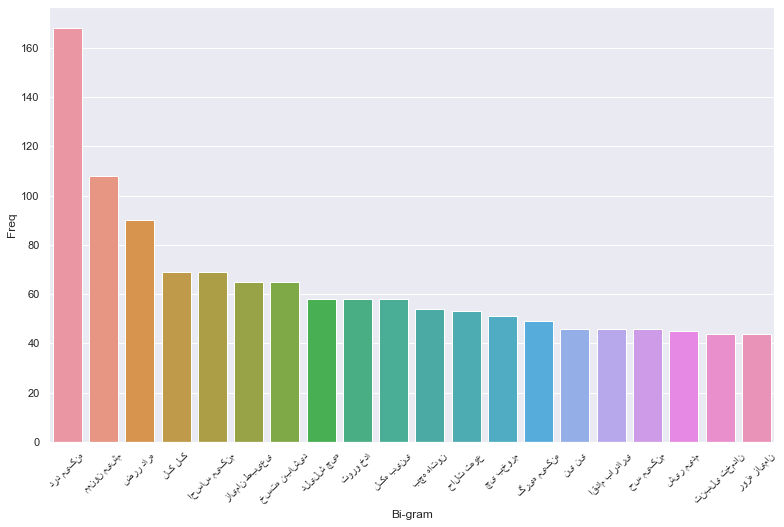

In [61]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

             Tri-gram  Freq
0      ⁄Ü€å ŸÖ€åÿ™ŸàŸÜŸá ÿ®ÿßÿ¥Ÿá    29
1        ⁄Ü€å ÿ®ÿÆŸàÿ±ŸÖ ÿ≥⁄©ÿ≥    26
2     ÿ®ÿÆŸàÿ±ŸÖ ÿ≥⁄©ÿ≥ ÿ¥ŸáŸàÿ™ŸÖ    26
3      ÿ≥⁄©ÿ≥ ÿ¥ŸáŸàÿ™ŸÖ ÿ≤€åÿßÿØ    26
4      ÿ¥ŸáŸàÿ™ŸÖ ÿ≤€åÿßÿØ ÿ®ÿ¥Ÿá    26
5     ŸÖ€å⁄Ø€åÿ±Ÿá ŸàŸÑ ŸÖ€å⁄©ŸÜŸá    25
6    ÿ±ŸÅÿ™ŸÖ ÿØÿ≥ÿ¥Ÿà€å€å ŸÑ⁄©Ÿá€å    23
7     ÿÆŸàŸÜŸá ŸÖÿßÿØÿ± ÿ¥ŸàŸáÿ±ŸÖ    21
8      ÿ¥⁄©ŸÖŸÖ ÿØÿ±ÿØ ŸÖ€å⁄©ŸÜŸá    19
9      ⁄©ŸÖÿ±ŸÖ ÿØÿ±ÿØ ŸÖ€å⁄©ŸÜŸá    18
10   ÿ®ÿßÿ±ÿØÿßÿ±€å ÿ∂ÿ±ÿ± ÿØÿßÿ±Ÿá    18
11     ÿØÿßÿ±Ÿá Ÿàÿßÿ≥Ÿá ÿ¨ŸÜ€åŸÜ    18
12        ÿßÿ≥ŸÖ Ÿæÿ≥ÿ± ÿßÿ≥ŸÖ    18
13       Ÿæÿ≥ÿ± ÿßÿ≥ŸÖ ÿ®€åÿßÿØ    18
14  ⁄Øÿ±€åŸá ŸÖ€å⁄©ŸÜŸá ⁄Ü€å⁄©ÿßÿ±ÿ¥    17
15      ÿ∂ÿ±ÿ± ÿØÿßÿ±Ÿá Ÿàÿßÿ≥Ÿá    17
16    ŸÇ€åŸÖÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿ®ÿßÿ¥Ÿá    17
17       ÿ≥Ÿá ÿØ€å⁄ØŸá ŸÖ€åÿ±ŸÖ    17
18    ÿÆÿßŸÜŸàŸÖÿß ÿ¢ŸÖŸæŸàŸÑ ÿ≥Ÿá    17
19      ÿ¢ŸÖŸæŸàŸÑ ÿ≥Ÿá ŸÖÿßŸáŸá    17


[Text(0, 0, '⁄Ü€å ŸÖ€åÿ™ŸàŸÜŸá ÿ®ÿßÿ¥Ÿá'),
 Text(0, 0, '⁄Ü€å ÿ®ÿÆŸàÿ±ŸÖ ÿ≥⁄©ÿ≥'),
 Text(0, 0, 'ÿ®ÿÆŸàÿ±ŸÖ ÿ≥⁄©ÿ≥ ÿ¥ŸáŸàÿ™ŸÖ'),
 Text(0, 0, 'ÿ≥⁄©ÿ≥ ÿ¥ŸáŸàÿ™ŸÖ ÿ≤€åÿßÿØ'),
 Text(0, 0, 'ÿ¥ŸáŸàÿ™ŸÖ ÿ≤€åÿßÿØ ÿ®ÿ¥Ÿá'),
 Text(0, 0, 'ŸÖ€å⁄Ø€åÿ±Ÿá ŸàŸÑ ŸÖ€å⁄©ŸÜŸá'),
 Text(0, 0, 'ÿ±ŸÅÿ™ŸÖ ÿØÿ≥ÿ¥Ÿà€å€å ŸÑ⁄©Ÿá€å'),
 Text(0, 0, 'ÿÆŸàŸÜŸá ŸÖÿßÿØÿ± ÿ¥ŸàŸáÿ±ŸÖ'),
 Text(0, 0, 'ÿ¥⁄©ŸÖŸÖ ÿØÿ±ÿØ ŸÖ€å⁄©ŸÜŸá'),
 Text(0, 0, '⁄©ŸÖÿ±ŸÖ ÿØÿ±ÿØ ŸÖ€å⁄©ŸÜŸá'),
 Text(0, 0, 'ÿ®ÿßÿ±ÿØÿßÿ±€å ÿ∂ÿ±ÿ± ÿØÿßÿ±Ÿá'),
 Text(0, 0, 'ÿØÿßÿ±Ÿá Ÿàÿßÿ≥Ÿá ÿ¨ŸÜ€åŸÜ'),
 Text(0, 0, 'ÿßÿ≥ŸÖ Ÿæÿ≥ÿ± ÿßÿ≥ŸÖ'),
 Text(0, 0, 'Ÿæÿ≥ÿ± ÿßÿ≥ŸÖ ÿ®€åÿßÿØ'),
 Text(0, 0, '⁄Øÿ±€åŸá ŸÖ€å⁄©ŸÜŸá ⁄Ü€å⁄©ÿßÿ±ÿ¥'),
 Text(0, 0, 'ÿ∂ÿ±ÿ± ÿØÿßÿ±Ÿá Ÿàÿßÿ≥Ÿá'),
 Text(0, 0, 'ŸÇ€åŸÖÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿ®ÿßÿ¥Ÿá'),
 Text(0, 0, 'ÿ≥Ÿá ÿØ€å⁄ØŸá ŸÖ€åÿ±ŸÖ'),
 Text(0, 0, 'ÿÆÿßŸÜŸàŸÖÿß ÿ¢ŸÖŸæŸàŸÑ ÿ≥Ÿá'),
 Text(0, 0, 'ÿ¢ŸÖŸæŸàŸÑ ÿ≥Ÿá ŸÖÿßŸáŸá')]

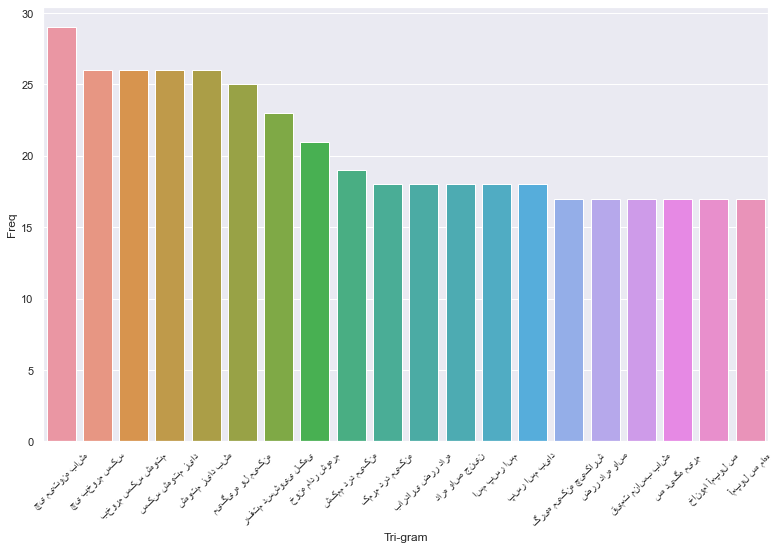

In [62]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


## Converting to a matrix of integers


In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()


In [64]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=20):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [65]:
dockeys = []
i = j = 0
droppList = []
for doc in corpus:
#     # fetch document for which keywords needs to be extracted
#     doc=corpus[500]
    if len(doc.split())<5:
        doc = holdingCorpus[i]
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 100
    keywords=extract_topn_from_vector(feature_names,sorted_items,100)

    # now print the results
#     print("\nQuestion:")
#     print(doc)
#     print("\nKeywords:")
    Qkey = ''
    keyScore = []
    for k in keywords:

        Qkey = Qkey + ' '+k
    
    if len(Qkey)<3:
        droppList.append(i)
        j += 1
        #print(j, dataset['text'][i])
        i += 1
        continue

        
    dockeys.append(Qkey)
    i += 1
dataset.drop(droppList,inplace=True)
dataset['Q_keyword'] = dockeys

In [66]:
dataset.to_excel('Question_kewords and key score.xlsx', index=False)
dataset = pd.read_excel('Question_kewords and key score.xlsx')

In [67]:
normalizer = Normalizer()
# print(dataset['text'][1])
normalizList = []
normalizList = [normalizer.normalize(dataset['Q_keyword'][i]) for i in  range(len(dataset['Q_keyword']))]
dataset['Q_keyword'] = normalizList

In [68]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [69]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [70]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("persian"))
# ##Creating a list of custom stopwords
# new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
# stop_words = stop_words.union(new_words)

In [71]:
corpus = []
for i in range(len(dataset['Q_keyword'])):
    #Remove punctuations
    each = dataset['Q_keyword'][i].replace('\u200f',' ')
    text = re.sub(r'[^a-zA-Z0-9ÿ¢-€å€∞-€π ]', '', each)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [73]:
#Fetch wordcount for each abstract
corpusData = []
corpusData = pd.DataFrame(corpusData)
corpusData['Q_keyword'] = corpus
corpusData['Keyword_count'] = corpusData['Q_keyword'].apply(lambda x: len(str(x).split(' ')))
corpusData[['Q_keyword','Keyword_count']].head()


Q_keyword  Keyword_count
0                             ÿ®€åÿß€å€åŸÜ ŸÖÿ´ÿ®ÿ™ ÿ≥ŸàÿßŸÑ ÿ®⁄ÜŸáŸáÿß              4
1  ÿÆÿØÿß€å ŸÜ⁄©ÿ±ÿØŸá ÿ®ŸÜÿØŸá ÿÆÿØÿß ÿÆÿØÿß€å ⁄©ÿßÿ±Ÿà ŸÜ⁄Øÿß ÿØ⁄©ÿ™ÿ±€å ÿ≠ÿßŸÑÿ™ŸàŸÜ...             28
2  ÿ≥ŸÇÿ∑ ÿ¨ŸÜ€åŸÜ ÿπ⁄©ÿ≥ €å⁄©ŸÖ ÿ±ÿπÿß€åÿ™ ÿ®ÿßÿ±ÿØÿßÿ±ŸÜ ŸÖ€åÿ≤ÿßÿ±€åŸÜ ÿ±ÿπÿß€åÿ™ ÿ®...             20
3                 ⁄ÜÿßŸÑÿ¥ ÿπÿ¨ÿ® ÿ≠ŸàÿµŸÑŸÖ ⁄Üÿ∑Ÿàÿ±Ÿá ⁄ØŸÑ ÿ®⁄Ø€åŸÜ ÿÆÿßŸÜŸÖÿß              7
4           ÿÆŸàÿ¥⁄ØŸÑ ÿ¢ÿÆÿ±€åŸÜ ⁄Üÿ∑Ÿàÿ±Ÿá ÿÆŸàÿ®€åÿØ ÿ¥ŸÖÿßÿ±Ÿá ÿ±ŸÜ⁄Ø ŸÖ€åÿÆŸàÿßŸÖ              7

In [74]:
dataset['Q_keyword'] , dataset['Keyword_count'] = corpusData['Q_keyword'], corpusData['Keyword_count']

In [75]:
dataset.to_excel('Question_kewords and key score.xlsx', index=False)

In [76]:
# # fetch document for which keywords needs to be extracted
# doc=corpus[1]
# if len(doc.split())<5:
#     doc = holdingCorpus[1353]
# print(doc)
# print(len(doc.split()))
# #generate tf-idf for the given document
# tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

# #sort the tf-idf vectors by descending order of scores
# sorted_items=sort_coo(tf_idf_vector.tocoo())
# #extract only the top n; n here is 100
# keywords=extract_topn_from_vector(feature_names,sorted_items,100)

# # now print the results
# print("\nQuestion:")
# print(doc)
# print("\nKeywords:")
# # Qkey = ''
# # keyScore = []
# print(keywords)
# for k in keywords:

#     print(k, keywords[k])


In [77]:
# len(droppList)